In [5]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import math



In [7]:
def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data points."""
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids, max_capacity):
    """Assign data points to the nearest centroid while respecting max capacity."""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    cluster_assignments = np.full(data.shape[0], -1, dtype=int) # -1 indicates unassigned
    cluster_sizes = np.zeros(centroids.shape[0], dtype=int)
    
    for i in range(data.shape[0]):
        for idx in np.argsort(distances[:, i]):
            if cluster_sizes[idx] < max_capacity:
                cluster_assignments[i] = idx
                cluster_sizes[idx] += 1
                break
    return cluster_assignments

def update_centroids(data, assignments, k):
    """Recalculate centroids as the mean of assigned data points."""
    centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means_with_capacity(data, k, max_capacity, max_iters=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        assignments = assign_clusters(data, centroids, max_capacity)
        new_centroids = update_centroids(data, assignments, k)
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return assignments, centroids

In [3]:
# Example usage
data = np.random.rand(100, 10) # 100 data points in 2D space
k = 4  # Number of clusters
max_capacity =26  # Maximum number of data points per cluster
max_iters = 200
assignments, centroids = k_means_with_capacity(data, k, max_capacity, max_iters)
print(assignments)

[2 3 2 2 0 2 3 3 3 3 3 2 0 1 1 2 1 2 2 2 3 1 1 0 0 2 1 1 1 3 1 0 3 1 2 0 2
 1 1 2 0 3 1 2 3 3 0 3 1 3 3 2 1 2 1 2 0 1 0 1 1 0 0 0 1 2 1 2 2 1 0 3 3 1
 0 3 0 0 0 1 3 2 0 1 3 3 2 0 2 1 3 2 2 0 0 3 0 2 0 0]


In [6]:
print(np.sum(assignments==0))
print(np.sum(assignments==1))
print(np.sum(assignments==2))
print(np.sum(assignments==3))

22
26
26
26


In [11]:
#split cora data into 28 clusters. each cluster has 100 nodes at most
cora_data = np.load('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/all_data/all_embs.npy')
cora_lables = np.load('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/all_data/all_ps_labels.npy')


In [8]:
k = 27
max_capacity =101
max_iters = 200
cora_assignments, cora_centroids = k_means_with_capacity(cora_data, k, max_capacity, max_iters)

In [13]:
np.unique(cora_assignments, return_counts=True)
np.save('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/all_data/all_ps_cluster_kmeans.npy', cora_assignments)

In [34]:
#split cora data into 50, 200, 300 clusters
cora_data_num = 2708.0
for k in [10, 25, 50, 100, 150, 200]:
    max_capacity = math.ceil(cora_data_num/k)
    print(f"max_capacity:{max_capacity}")
    max_iters = 200
    cora_assignments, cora_centroids = k_means_with_capacity(cora_data, k, max_capacity, max_iters)
    np.save('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/all_ps_cluster_kmeans_k{}.npy'.format(k), cora_assignments)
    print(np.unique(cora_assignments, return_counts=True))

max_capacity:271


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([271, 271, 271, 271, 271, 269, 271, 271, 271, 271]))
max_capacity:109
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]), array([109, 109, 109, 109, 109, 109, 109, 109, 109, 109,  94, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 107]))
max_capacity:55
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), array([55, 55, 55, 55, 55, 55, 55, 41, 55, 55, 55, 55, 55, 55, 55, 55, 55,
       55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55,
       55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 27, 55, 55, 55, 55]))
max_capacity:28
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 

In [23]:
cora_assignments.min()

0

In [42]:
import numpy as np

total_nodes = 2708
total_groups = 100

# Determine nodes per group and extra nodes
nodes_per_group = total_nodes // total_groups
extra_nodes = total_nodes % total_groups

# Array to hold group assignments
group_labels = np.zeros(total_nodes, dtype=int)
current_index = 0

# Assign groups, considering some will have an extra node
for group in range(total_groups):
    if group < extra_nodes:
        group_size = nodes_per_group + 1
    else:
        group_size = nodes_per_group
    
    group_labels[current_index:current_index + group_size] = group
    current_index += group_size

# Shuffle nodes to distribute randomly
nodes = np.arange(total_nodes)
np.random.shuffle(nodes)
shuffled_group_labels = group_labels[nodes]

# Optional: Verify the distribution
node_counts_per_group = np.bincount(shuffled_group_labels, minlength=total_groups)
print("Node counts per group:", node_counts_per_group)

# Print shuffled group labels for verification
print("Shuffled Group Labels:", shuffled_group_labels)

Node counts per group: [28 28 28 28 28 28 28 28 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27]
Shuffled Group Labels: [52 64 21 ... 30 65 59]


In [41]:
np.save('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/all_ps_cluster_kmeans_k{}random.npy'.format(200), group_labels)

In [49]:
a = np.load("/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/all_ps_cluster_kmeans_k50.npy")
print(np.unique(a, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), array([55, 55, 55, 55, 55, 55, 55, 41, 55, 55, 55, 55, 55, 55, 55, 55, 55,
       55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55,
       55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 27, 55, 55, 55, 55]))


In [40]:
print(np.unique(a, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([28, 28, 28, 28, 28, 20, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,  2, 28, 28, 28, 28,
       28, 28, 28, 28,  6, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 21, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 25, 28, 28, 28, 28,  2, 28, 28, 28, 28, 28]))


In [10]:
#split cora data into 28 clusters. each cluster has 100 nodes at most
ogbn_arxiv_data = np.load('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/ogbn-arxiv/all_embeds.npy')
ogbn_arxiv_lables = np.load('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/ogbn-arxiv/all_ps_labels.npy')

KeyboardInterrupt: 

In [7]:
k = 120
max_capacity =1412
max_iters = 200
ogbn_assignments, ogbn_centroids = k_means_with_capacity(ogbn_arxiv_data, k, max_capacity, max_iters)

In [15]:
np.unique(ogbn_assignments, return_counts=True)
np.save('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/ogbn-arxiv/all_ps_cluster_kmeans.npy', ogbn_assignments)

In [19]:
data = ogbn_arxiv_data  
data_assignments = ogbn_assignments
data_labels = ogbn_arxiv_lables

In [20]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(data)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 169343 samples in 0.028s...


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7ddd6831f0>
Traceback (most recent call last):
  File "/home/local/ASUAD/changyu2/miniconda3/envs/ldm/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/local/ASUAD/changyu2/miniconda3/envs/ldm/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/local/ASUAD/changyu2/miniconda3/envs/ldm/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/local/ASUAD/changyu2/miniconda3/envs/ldm/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[t-SNE] Computed neighbors for 169343 samples in 42.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 169343
[t-SNE] Computed conditional probabilities for sample 2000 / 169343
[t-SNE] Computed conditional probabilities for sample 3000 / 169343
[t-SNE] Computed conditional probabilities for sample 4000 / 169343
[t-SNE] Computed conditional probabilities for sample 5000 / 169343
[t-SNE] Computed conditional probabilities for sample 6000 / 169343
[t-SNE] Computed conditional probabilities for sample 7000 / 169343
[t-SNE] Computed conditional probabilities for sample 8000 / 169343
[t-SNE] Computed conditional probabilities for sample 9000 / 169343
[t-SNE] Computed conditional probabilities for sample 10000 / 169343
[t-SNE] Computed conditional probabilities for sample 11000 / 169343
[t-SNE] Computed conditional probabilities for sample 12000 / 169343
[t-SNE] Computed conditional probabilities for sample 13000 / 169343
[t-SNE] Computed conditional probabilities for sampl

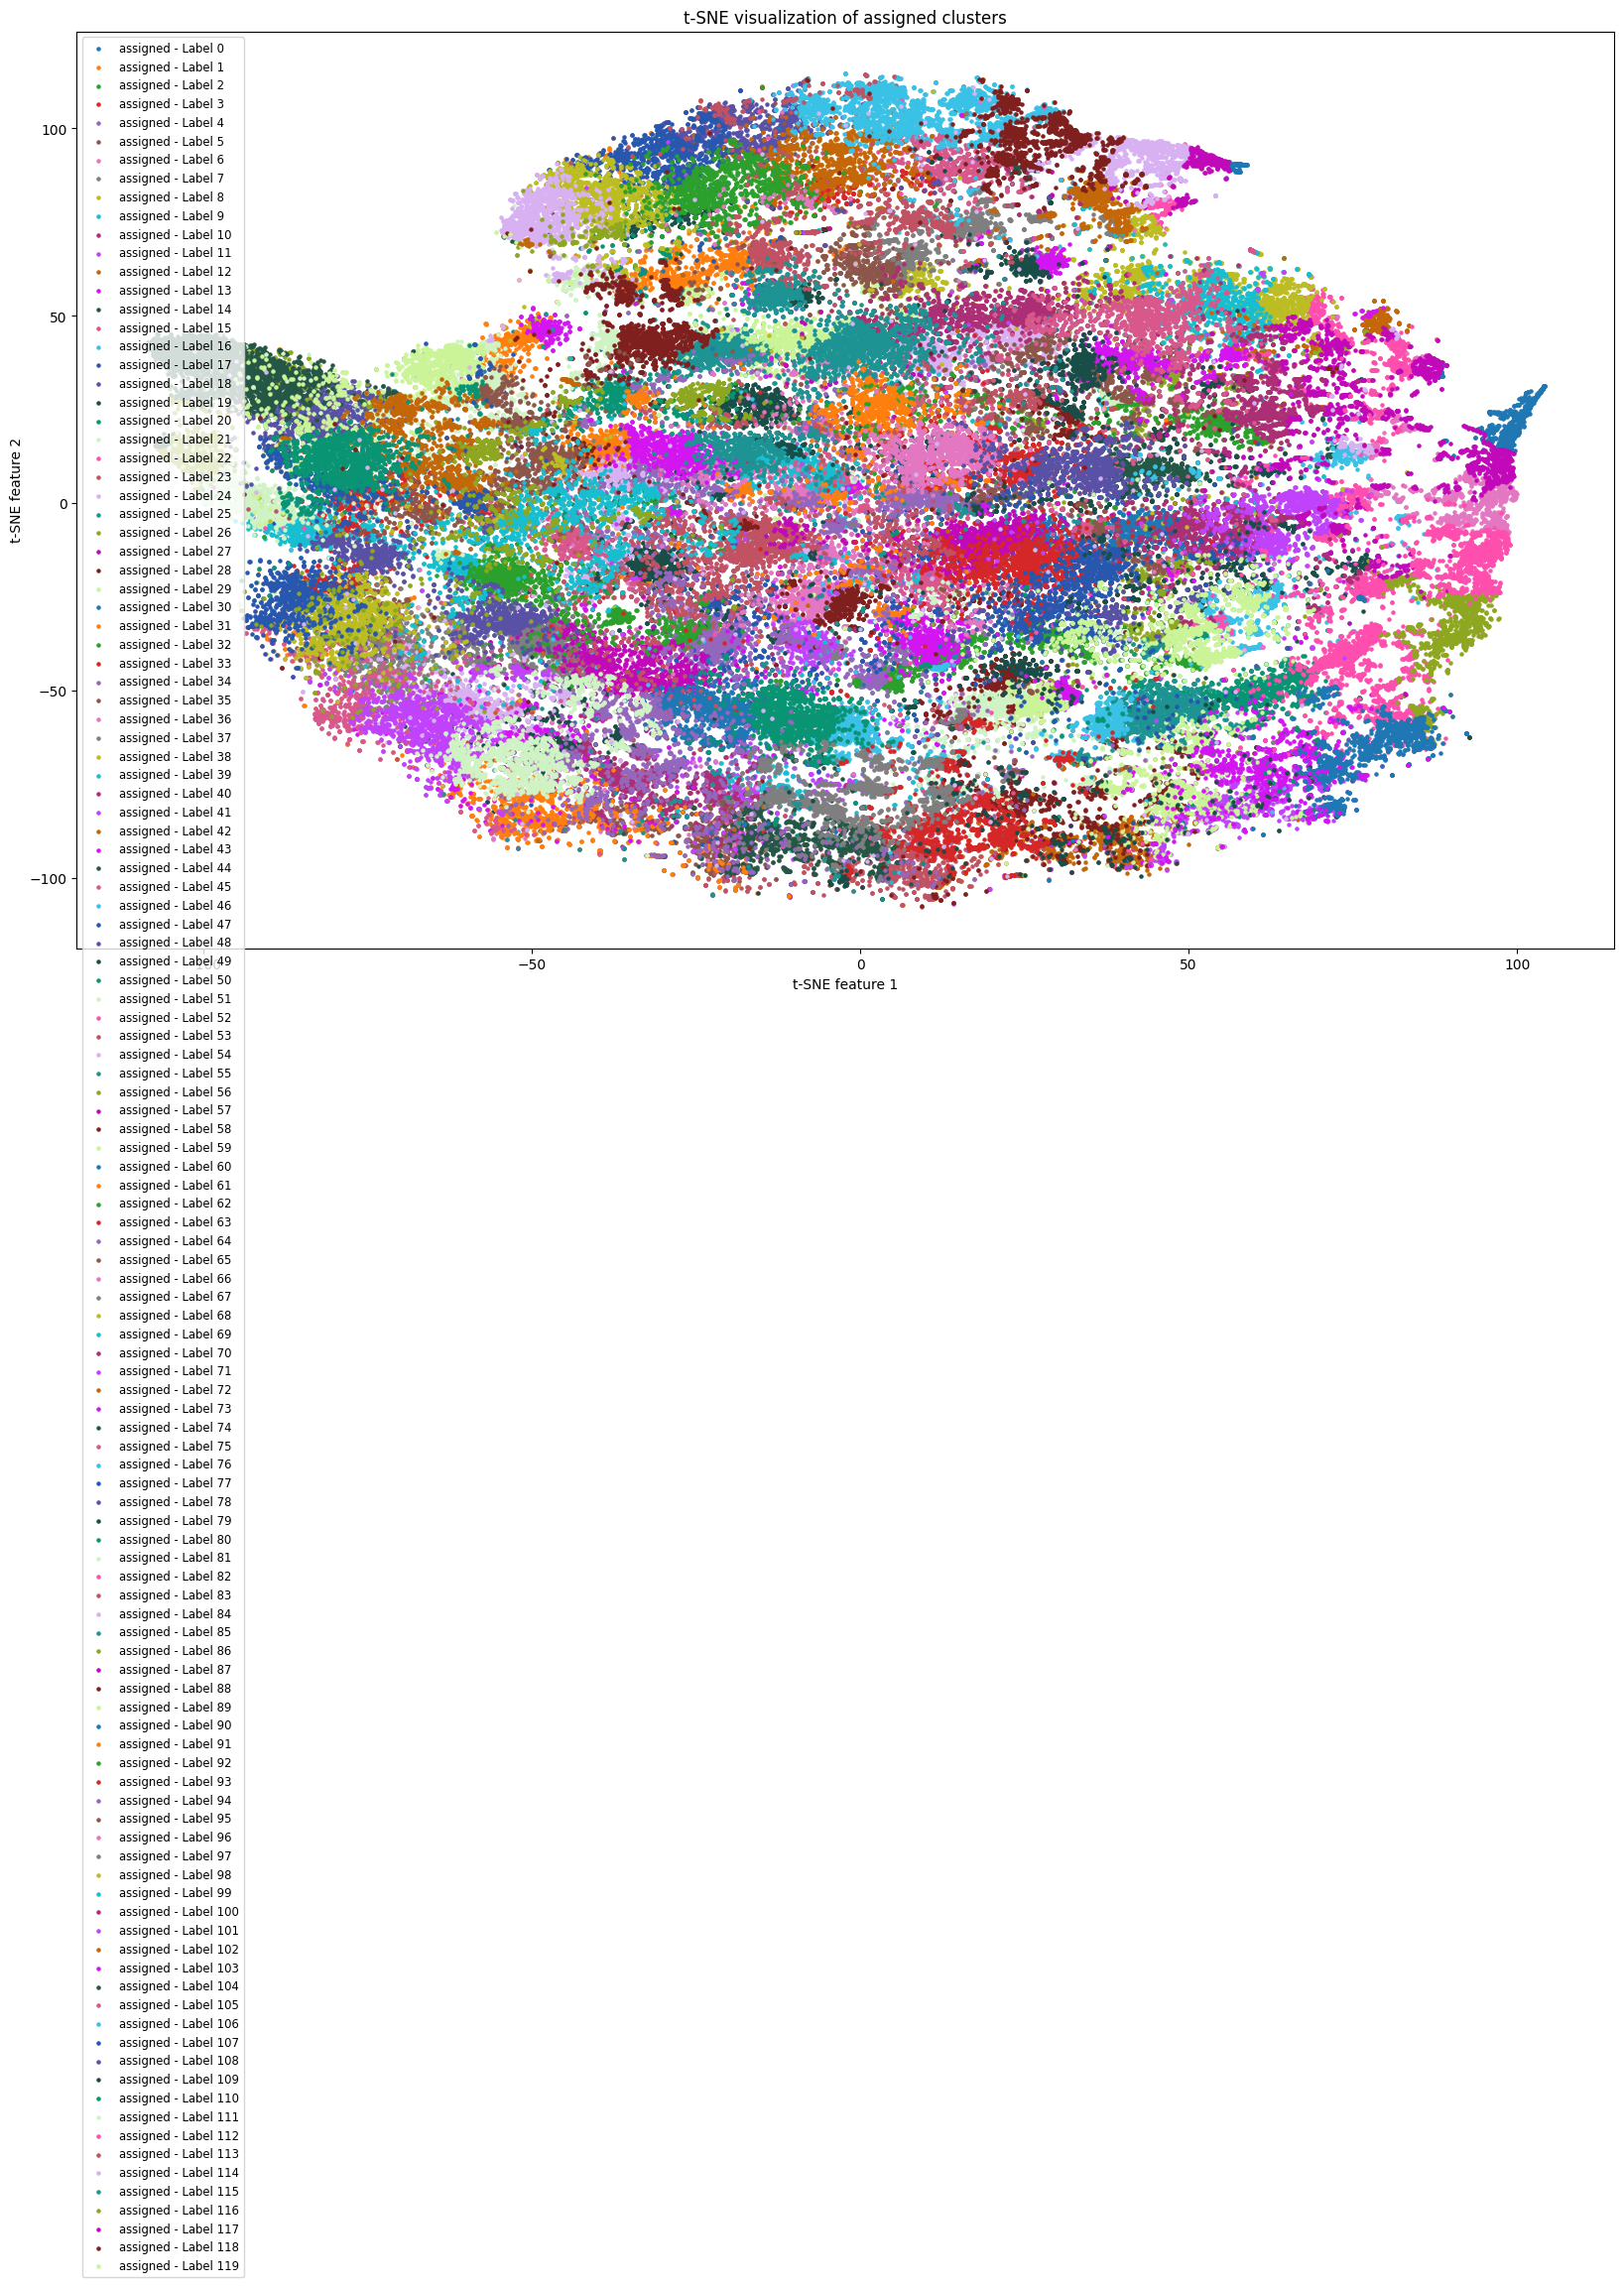

In [21]:
plt.figure(figsize=(20, 12))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
'#ac2f75',
'#c043fb',
'#c36709',
'#d315f2',
'#245746',
'#d8588c',
'#3ac1e6',
'#2757ae',
'#5851a5',
'#194d48',
'#099473',
'#d0f3c5',
'#fe4faf',
'#c05263',
'#d8b1f3',
'#1d9393',
'#8ea720',
'#c109b9',
'#7f201f',
'#caf497',]

unique_labels = np.unique(data_assignments)  # Get all unique assigned labels

for i in unique_labels:  # Iterate through each unique label
    # Plot real data
    plt.scatter(tsne_results[data_assignments == i, 0], tsne_results[data_assignments == i, 1], 
                color=colors[i % len(colors)], label=f'assigned - Label {i}', s=5)



plt.legend(fontsize='small')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of assigned clusters')
plt.show()

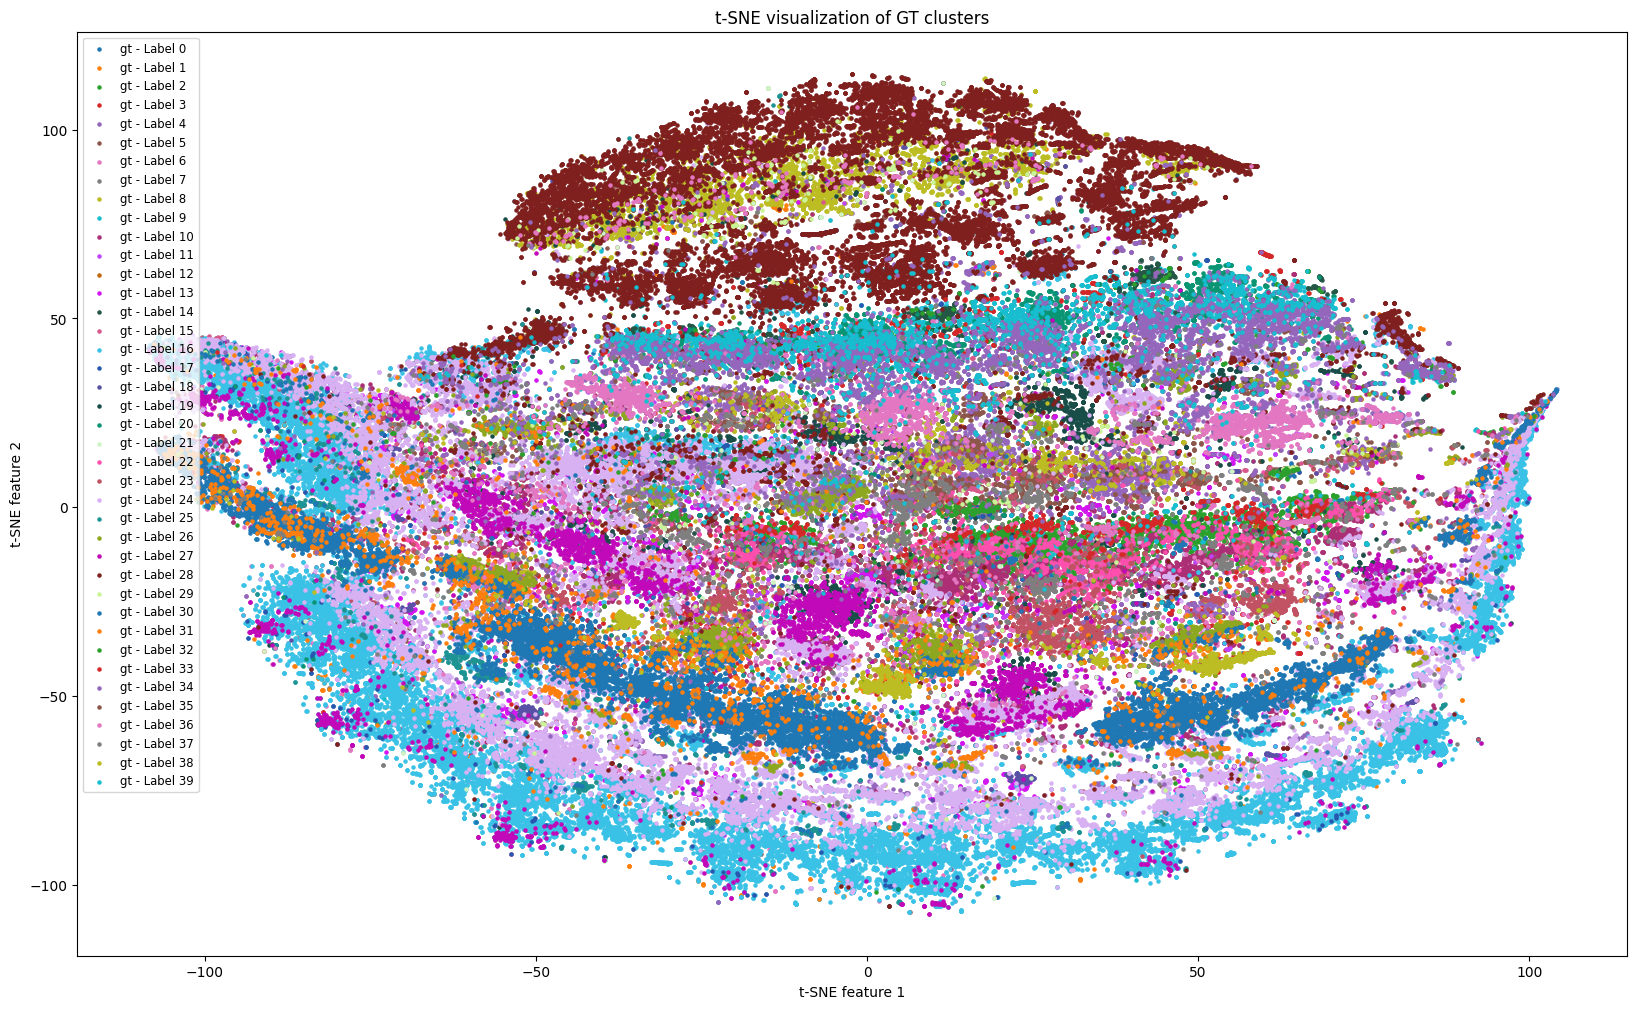

In [22]:
plt.figure(figsize=(20, 12))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
'#ac2f75',
'#c043fb',
'#c36709',
'#d315f2',
'#245746',
'#d8588c',
'#3ac1e6',
'#2757ae',
'#5851a5',
'#194d48',
'#099473',
'#d0f3c5',
'#fe4faf',
'#c05263',
'#d8b1f3',
'#1d9393',
'#8ea720',
'#c109b9',
'#7f201f',
'#caf497',]

unique_labels = np.unique(data_labels)  # Get all unique assigned labels

for i in unique_labels:  # Iterate through each unique label
    # Plot real data
    plt.scatter(tsne_results[data_labels == i, 0], tsne_results[data_labels == i, 1], 
                color=colors[i % len(colors)], label=f'gt - Label {i}', s=5)



plt.legend(fontsize='small')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of GT clusters')
plt.show()

In [54]:
import scipy.sparse as sp
a = sp.load_npz("/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/ogbn-arxiv/adj.npz")

In [70]:
a.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [68]:
b.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]])

In [64]:
b = sp.load_npz("/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/adj.npz")